# 텐서플로 1.x

In [ ]:
%tensorflow_version 1.x

In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
tf.enable_eager_execution()
tf.__version__

AttributeError: ignored

In [ ]:
# 유방암 데이터 가져오기
cancer = datasets.load_breast_cancer()

# 타입 변환, 텐서플로는 float32 사용
# 한 번 만든 코드가 아무데서나 잘 굴러가는 것 = 확장성
X = cancer.data
X = np.array(X , dtype="float32")

y = cancer.target
y = np.array(y , dtype="float32")

In [ ]:
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df['target'] = cancer.target
df

In [ ]:
# 차원 맞추기 = 2차원 배열
# y.reshape(569, 1) : 569줄 1칸
# y.reshape(-1, 1) : 줄 생략 1칸 : 569줄 1칸

# y 차원 변환
print("y.shape = ", y.shape)

# reshape(줄, 칸)
print("y.reshape(569, 1) = ", y.reshape(569,1).shape)

# reshape(-1, 1) 
# '-1' -> 전체칸(줄) 자동 선택
print("y.reshape(-1, 1) = ", y.reshape(-1,1).shape)


In [ ]:
# 독립변수75%, 종속75% = cost가 최소 w,b 찾기
# 25% = 성능 측정
# 훈련, 테스트셋 분리
X_train,X_test,y_train,y_test = train_test_split(X, y)

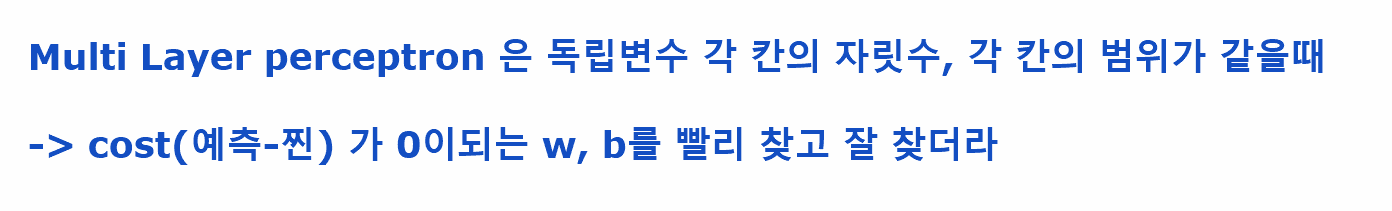

In [ ]:
from sklearn.preprocessing import StandardScaler
# 스케일러 
# 컬럼별 값들을 비슷한 범위로 조정

In [ ]:
#  X에서 평균을 빼고 표준편차로 나눠 평균 ->0 표준편차 ->1 변환할 객체
scaler = StandardScaler()
# X_train의 평균,표군편차 계산
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# X_train에서 평균을 빼고 표준편차로 나눠 X_train에 대입
X_train = scaler.transform(X_train)

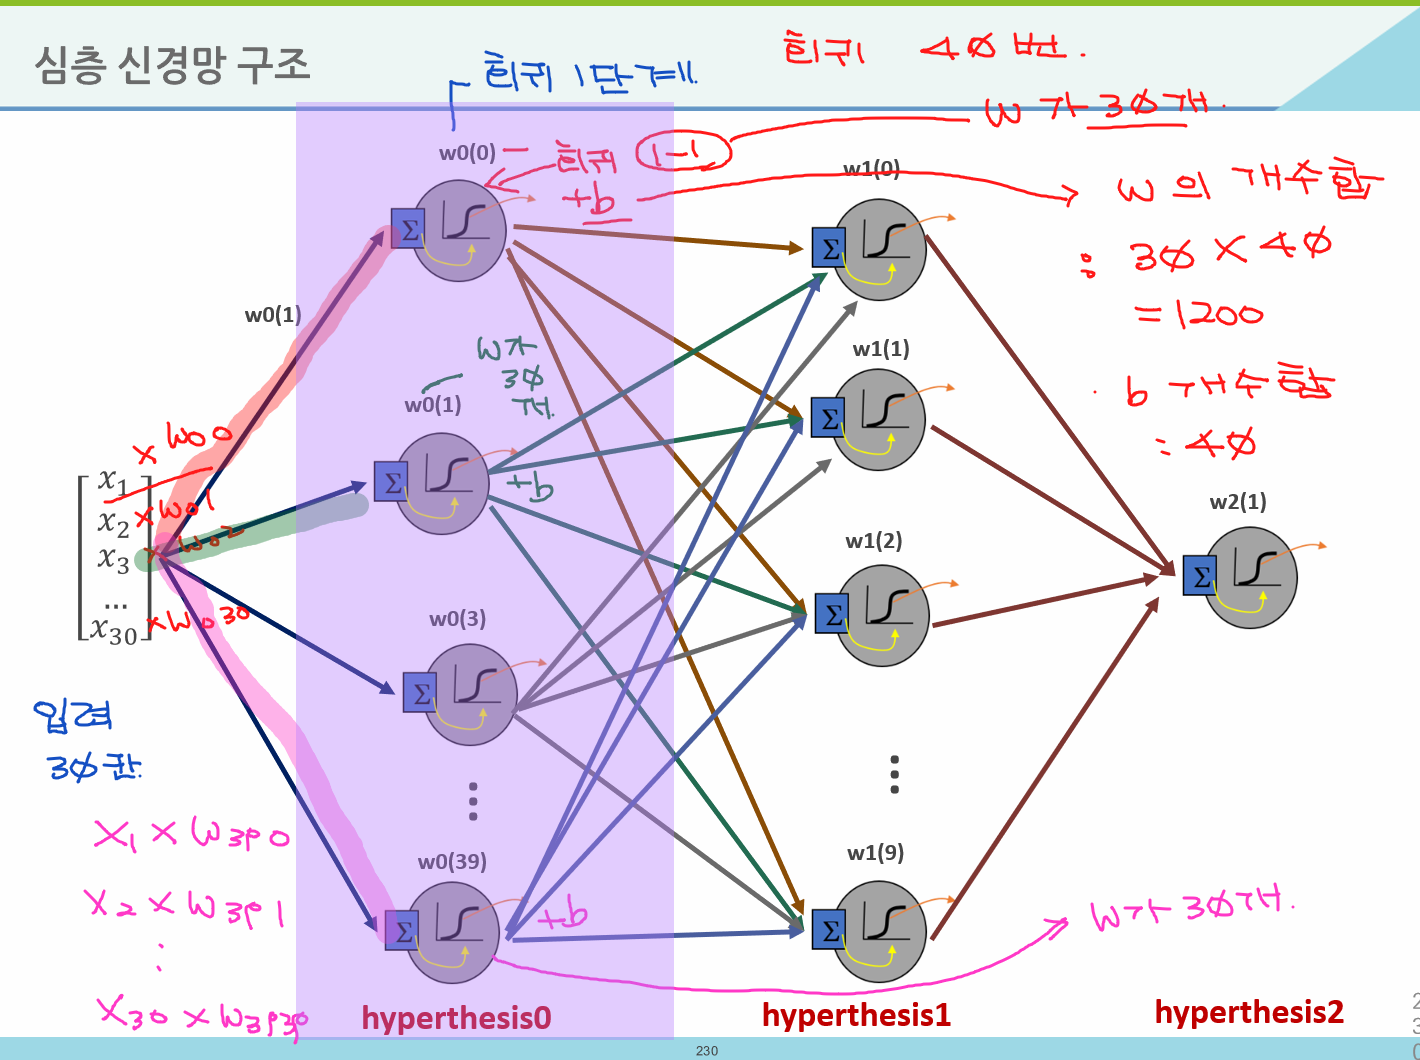

In [ ]:
# cost가 0이 되는 w,b를 찾아주는 함수
# w, b를 초기화 시키는 객체 생성
initializer = tf.contrib.layers.xavier_initializer()

In [ ]:
X.shape

(569, 30)

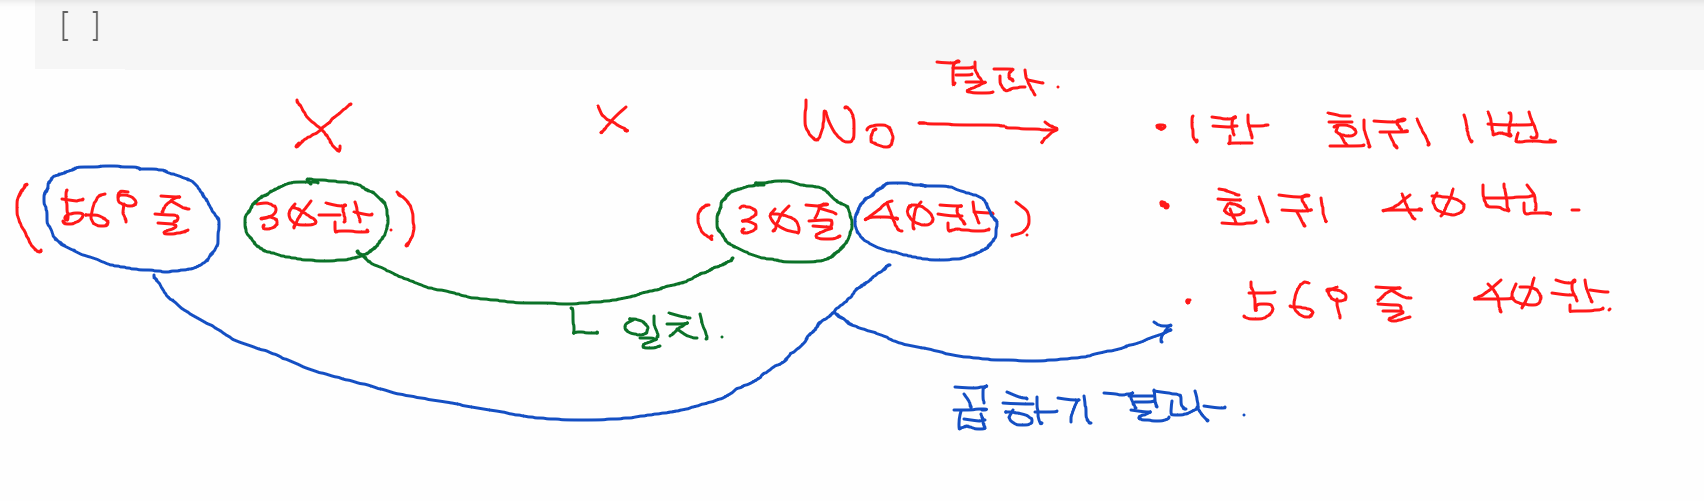

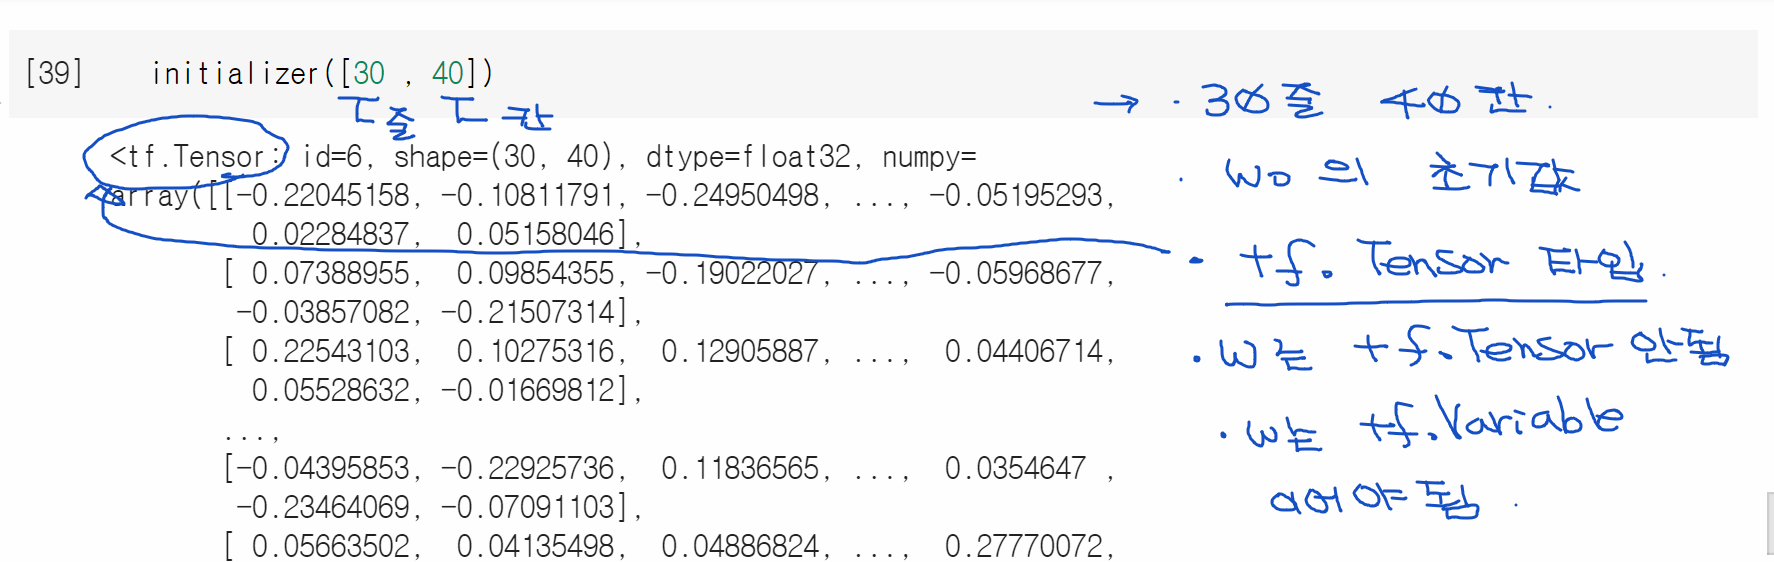

In [ ]:
# w type은  Variable 이어야함
w0 = tf.Variable( initializer([30 , 40]) )
b0 = tf.Variable(initializer([40]))

print("w0: \n",w0)
print("b0: \n",b0)

In [ ]:
# 1차 예측
# 예측 
hypothesis0 = tf.matmul(X_train, w0) + b0

# 예측값을 0~1 사이의 값으로 변환
hypothesis0  = tf.sigmoid(hypothesis0)

TensorShape([Dimension(426), Dimension(40)])

In [ ]:
# X_train 차원 형태
print("X_train.shape = ", X_train.shape)

# w0 차원 형태 : 회귀를 40번 할려고 함
print("w0.shape = ", w0.shape)

# 차원 곱셈시 X_train의 칸과  w0의 줄이 동일해야함
print("X_train의 칸 : {} , w0의 줄 : {}".format(X_train.shape[1], w0.shape[0]))

# 예측값 차원 형태 -> 426줄을 40번 회귀한 값
print("hypothesis0.shape = ",hypothesis0.shape)

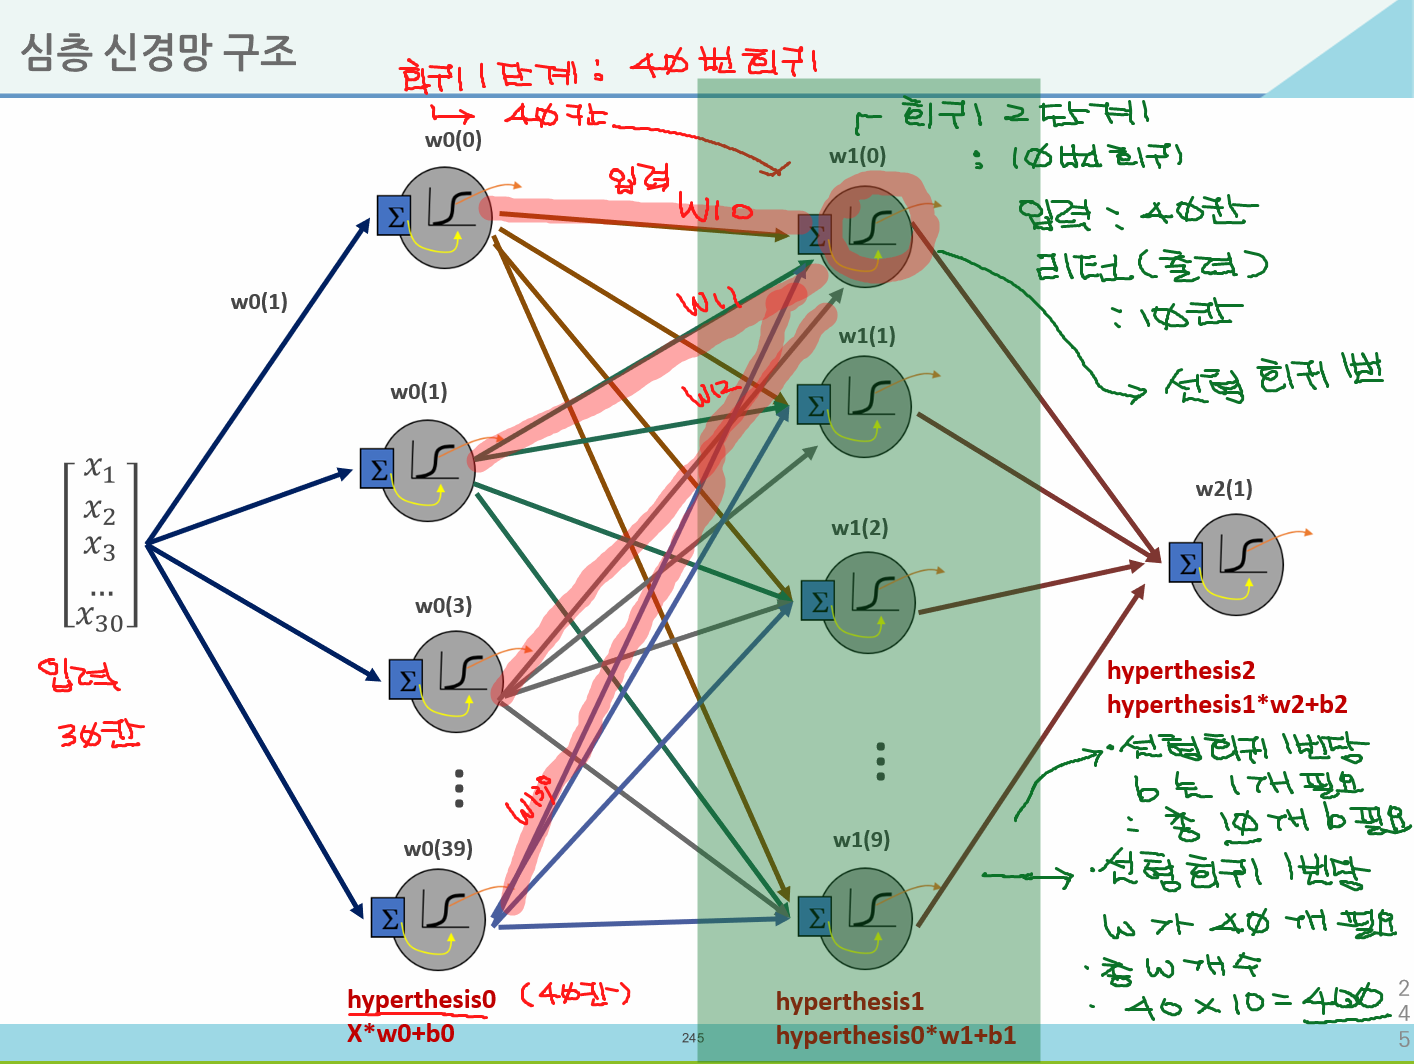

In [ ]:
hypothesis0.shape

TensorShape([Dimension(426), Dimension(40)])

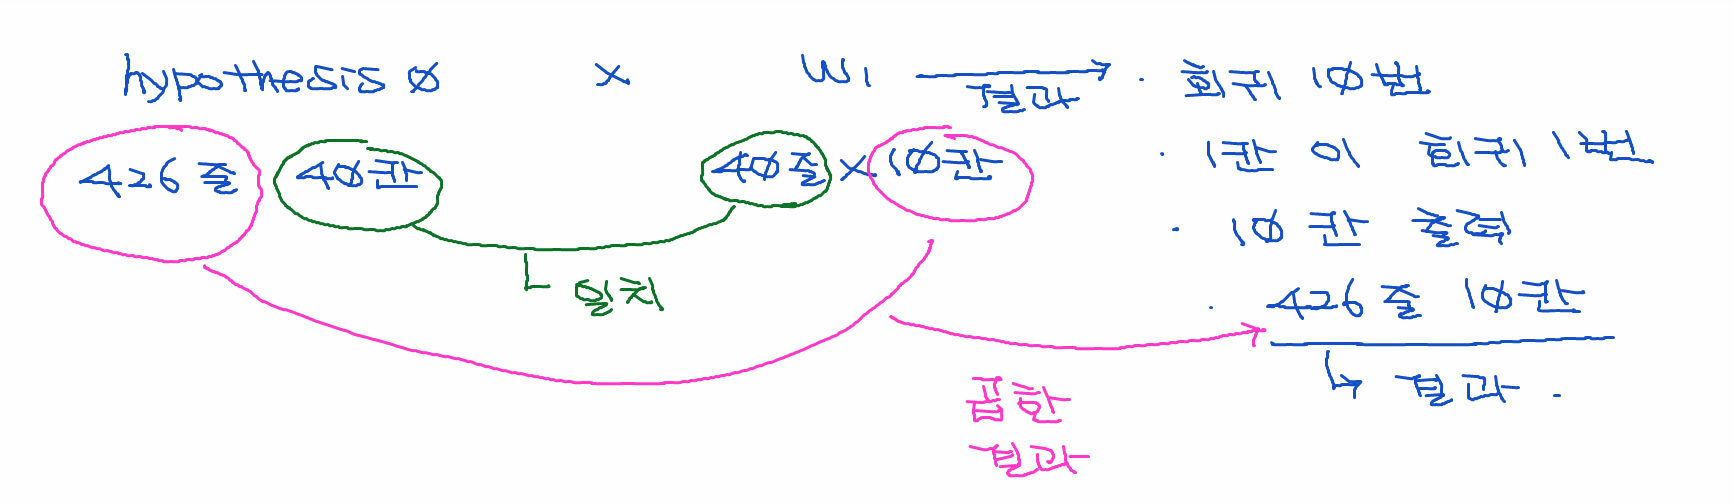

In [ ]:
# 40줄 10칸의 w1를 생성해서 리턴
w1 = tf.Variable(initializer([40, 10]))

# 10줄 1칸의 b1을 생성해서 리턴
b1 = tf.Variable(initializer([10]))

In [ ]:
# 2차 예측
# 예측
hypothesis1 = tf.matmul(hypothesis0, w1) + b1

# 예측값을 0~1 사이로 값으로 변환, 활성화함수 sigmoid 사용
hypothesis1 = tf.sigmoid(hypothesis1)

In [ ]:
# 예측값 차원 형태 -> 426줄을 40번 회귀한 값
print("hypothesis0.shape = ",hypothesis0.shape)

# w1 차원 형태 : 회귀를 10번 할려고 함
print("w0.shape = ", w1.shape)

# 차원 곱셈시 hypothesis0의 칸과  w1의 줄이 동일해야함
print("hypothesis0 의 칸 : {} , w1의 줄 : {}".format(hypothesis0.shape[1], w1.shape[0]))

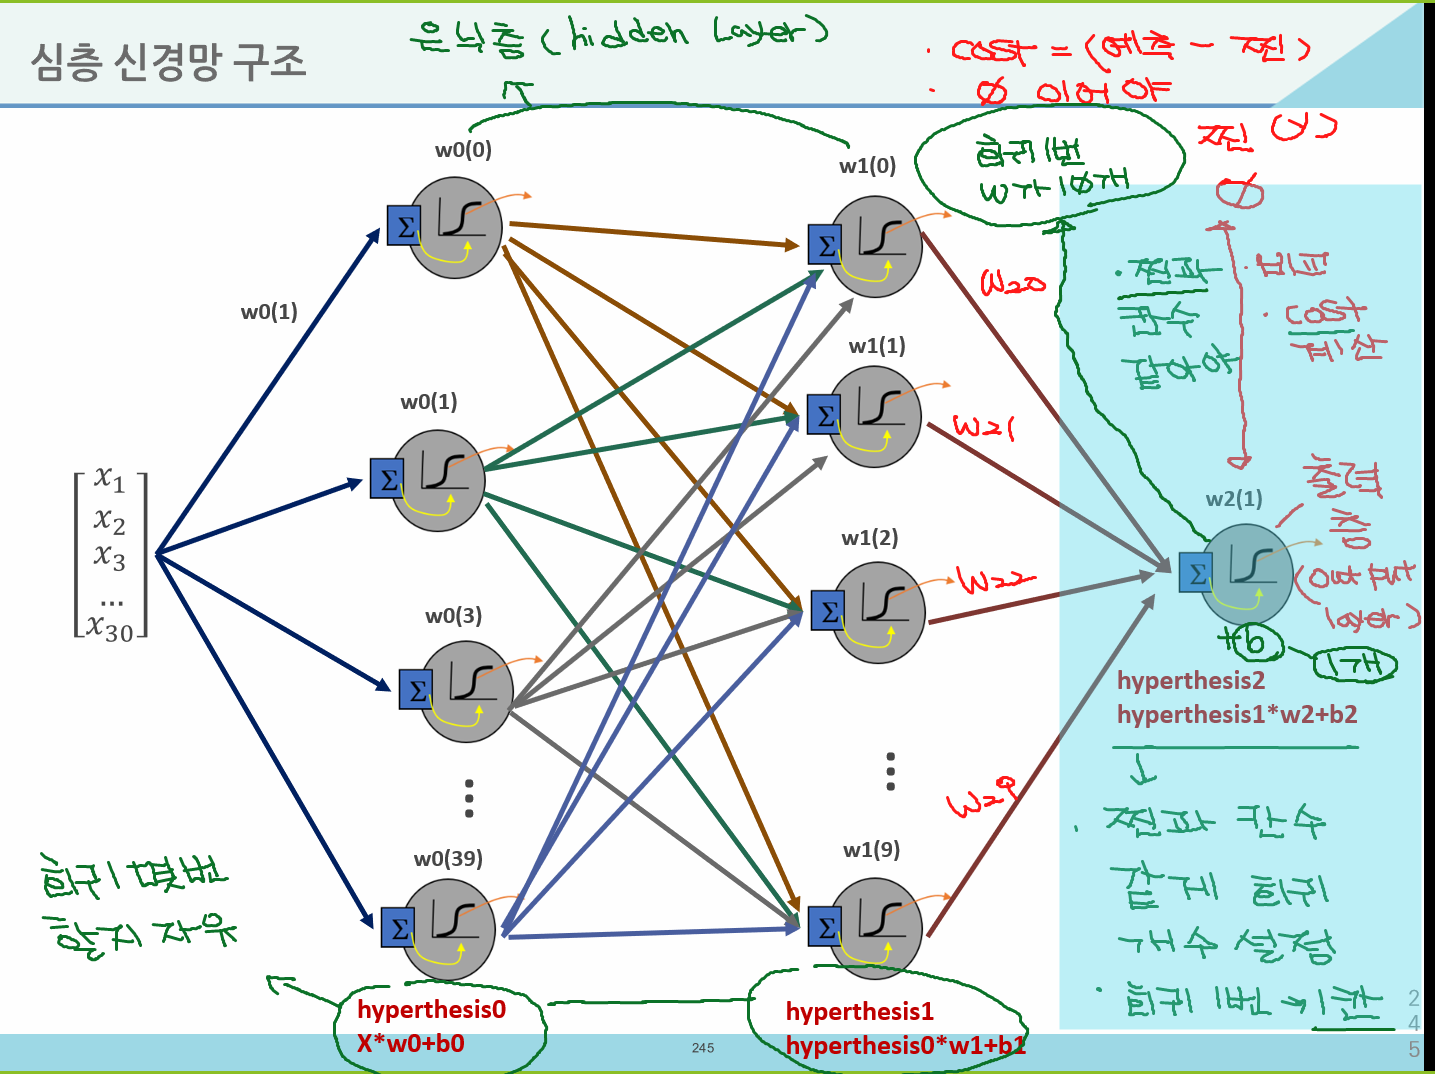

In [ ]:
hypothesis1.shape

TensorShape([Dimension(426), Dimension(10)])

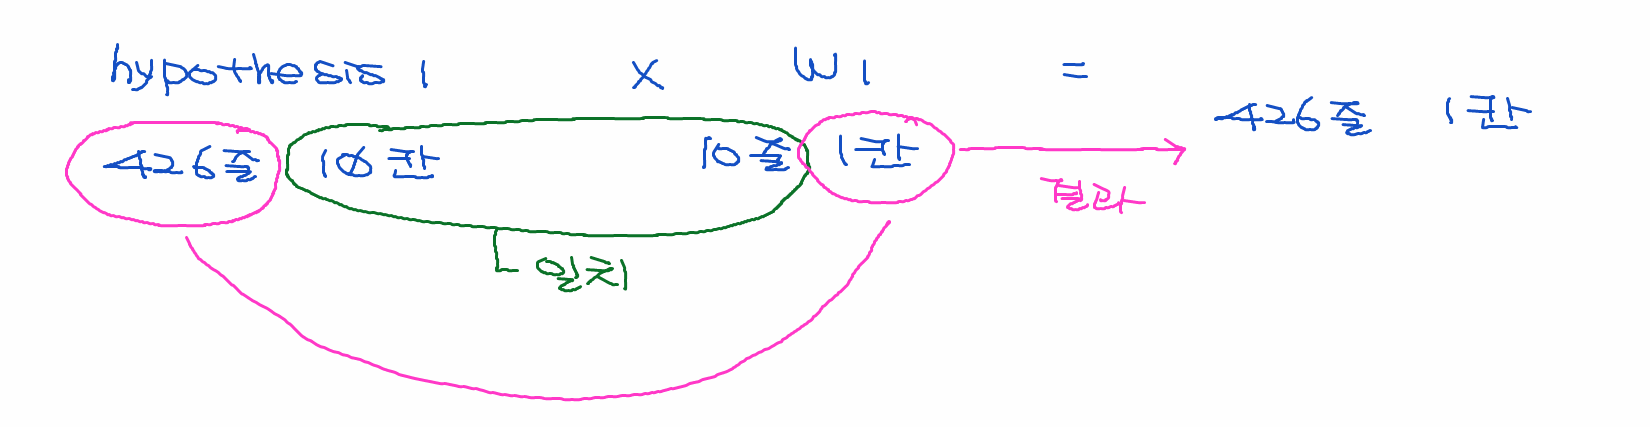

In [ ]:
w2 = tf.Variable(initializer([10,1]))
b2 = tf.Variable(initializer([1]))

# 3차 예측
# 예측
hypothesis2 = tf.matmul(hypothesis1, w2) + b2

# 예측값을 0~1 사이로 값으로 변환, 활성화함수 sigmoid 사용
hypothesis2 = tf.sigmoid(hypothesis2)

print(hypothesis2.shape)

In [ ]:
# 예측값 차원 형태 -> 426줄을 10번 회귀한 값
print("hypothesis1.shape = ",hypothesis1.shape)

# w2 차원 형태 : 회귀를 1번 할려고 함
print("w2.shape = ", w2.shape)

# 차원 곱셈시 hypothesis0의 칸과  w1의 줄이 동일해야함
print("hypothesis1 의 칸 : {} , w2의 줄 : {}".format(hypothesis1.shape[1], w2.shape[0]))

In [ ]:
hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0)+b0)
print("="* 100)
print("hypothesis0 = ", hypothesis0)
print("="* 100)

hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
print("hypothesis1 = ", hypothesis1)
print("="* 100)

hypothesis2 = tf.sigmoid(tf.matmul(hypothesis1, w2)+b2)
print("hypothesis1 = ", hypothesis2)
print("="* 100)

cost = -tf.reduce_mean( y_train * tf.log(hypothesis2)+ (1-y_train)*tf.log(1-hypothesis2))
print("cost = ", cost)

In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for step in range(1001):
    print("="*100)
    print("step = ", step)
    with tf.GradientTape() as tape:
        hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0)+b0)
        """print('='*100)
        print('hypothesis0=',hypothesis0)
        print('='*100)"""

        hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
        '''print('='*100)
        print('hypothesis1=',hypothesis1)
        print('='*100)'''

        # 마지막 출력층은 1칸
        # 찐이랑 cost비교 할 것이기 때문에 1칸
        hypothesis2 = tf.sigmoid(tf.matmul(hypothesis1, w2)+b2)
        print('='*100)
        print('hypothesis2=',hypothesis2)
        print('='*100)

        print('='*100)
        cost = -tf.reduce_mean( y_train * tf.log(hypothesis2)+ (1-y_train)*tf.log(1-hypothesis2))
        print("cost = ", cost)

        grads = tape.gradient(cost, [w0,w1,w2, b0,b1,b2])
        #print("grads(기울기) = ", grads)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [w0,w1,w2,b0,b1,b2]))

In [ ]:
# X_test에서 X_train의 평균을 빼고 X_train의 표준 편차로 나눠줌
X_test = scaler.transform(X_test)
X_test

array([[-0.3378454 , -0.8202887 , -0.32782736, ..., -0.19296978,
         1.084042  , -0.14304776],
       [-1.5579346 , -1.7896597 , -1.5383968 , ..., -1.0593268 ,
         0.53108037,  0.36529878],
       [ 2.143934  ,  0.67249584,  2.1698985 , ...,  1.949748  ,
         1.5529668 ,  0.9497853 ],
       ...,
       [ 0.9614556 ,  4.6626425 ,  0.893448  , ...,  1.4087496 ,
        -0.08574922,  0.06857667],
       [-0.16973406,  0.6771898 , -0.19729975, ...,  0.21733779,
        -0.055496  , -0.81543124],
       [-1.0900723 , -0.66537714, -1.064463  , ..., -0.46453267,
        -0.35802773,  0.6189121 ]], dtype=float32)

In [ ]:
hypothesis0 = tf.sigmoid(tf.matmul(X_test,w0)+b0)
hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0,w1)+b1)

# 예측
predict = tf.sigmoid(tf.matmul(hypothesis1,w2)+b2)

# 0.5 초과 1 / 이하 0 변환
predict01 = tf.cast(predict > 0.5, dtype = tf.float32)

# 예측값과 진짜값 일치 확인 맞으면 true, 아니면 false
ac01 = tf.equal(predict01, y_test)
# 0,1로 변경
ac02 = tf.cast(ac01, dtype='float32')

# 정확도
acc = tf.reduce_mean(tf.cast(tf.equal(predict01, y_test), dtype=tf.float32))
print('정확도=',acc.numpy())

정확도= 0.986014


## 심층 신경망을 이용한 유방암 분류 (텐서플로 1.x)

- 231 ~ 256

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
# X
X =cancer.data

# y
y = cancer.target

# X 타입 변환, 텐서플로는 float32 사용
X = np.array(X, dtype = 'float32')

# y 타입 변환, 텐서플로는 float32 사용
y= np.array(y, dtype = 'float32').reshape(-1, 1)

In [ ]:
# 훈련, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X , y)

In [ ]:
# 스케일러 
# 컬럼별 값들을 비슷한 범위로 조정
# X에서 평균을 뺴고 표준편차로 나눠서 평균 ->0, 표준편차 -> 1 로 변환
scaler = StandardScaler()

# X_train 평균, 표준편차 계산
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
# cost가 0이 되는 w,b를 찾아주는 함수
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# type = Variable

# 1차
w0 = tf.Variable(initializer([30 , 30]))

b0 = tf.Variable(initializer([30]))

# 2차
w1 = tf.Variable(initializer([30 , 10]))

b1 = tf.Variable(initializer([10]))

# 3차
w2 = tf.Variable(initializer([10 , 1]))

b2 = tf.Variable(initializer([1]))

In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for step in range(1001):
    with tf.GradientTape() as tape:
        hypothesis0 = tf.sigmoid( tf.matmul(X_train, w0)+ b0)
 
        hypothesis1 = tf.sigmoid( tf.matmul(hypothesis0, w1) + b1)

        hypothesis2 = tf.sigmoid( tf.matmul(hypothesis1, w2) + b2)

        cost = -tf.reduce_mean( y_train * tf.log(hypothesis2)+ (1-y_train)*tf.log(1-hypothesis2))

        grads = tape.gradient(cost, [w0,w1,w2, b0,b1,b2])

        optimizer.apply_gradients(grads_and_vars = zip(grads, [w0,w1,w2,b0,b1,b2]))

        if step % 100 == 0:
          print("="*50)
          print("step : {}, cost : {}".format(step, cost.numpy()))
          print("="*50)

step : 0, cost : 1.5251657962799072
step : 100, cost : 0.10819284617900848
step : 200, cost : 0.051201220601797104
step : 300, cost : 0.030002158135175705
step : 400, cost : 0.022291190922260284
step : 500, cost : 0.019371407106518745
step : 600, cost : 0.01799738220870495
step : 700, cost : 0.017248373478651047
step : 800, cost : 0.016795437783002853
step : 900, cost : 0.01649998314678669
step : 1000, cost : 0.016296178102493286


In [ ]:
# X_train의 평균과 표준편차를 계산 scaler로 X_test도 변환 해야함
X_test = scaler.transform(X_test)

# 예측1
hypothesis0 = tf.sigmoid(tf.matmul(X_test, w0)+b0)

# 예측2
hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)

# 최종 예측
predict = tf.sigmoid(tf.matmul(hypothesis1, w2)+b2)

In [ ]:
predict01 = tf.cast(predict > 0.5, dtype =tf.float32)

ac01 = tf.equal(predict01, y_test)

ac02 = tf.cast(ac01, dtype ="float32")

ac03 = tf.reduce_mean(ac02)
print("정확도 : ",ac03)

정확도 :  tf.Tensor(0.97202796, shape=(), dtype=float32)


## 심층 신경망을 이용한 유방암 분류 (텐서플로 2.x)

- 257 ~ 273

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn import  datasets
import numpy as np
from sklearn.model_selection import train_test_split
#tf.enable_eager_execution()

In [ ]:
# 유방암 데이터 가져오기
cancer = datasets.load_breast_cancer()
X = cancer.data
X = np.array(X , dtype="float32")

y = cancer.target
y = np.array(y , dtype="float32")

#y = y.reshape(-1, 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# X에서 평균을 빼고 표준편차로 나눠 평균-0, 표준편차-1 변환할 객체
scaler = StandardScaler()
# X_train의 평균, 표준편차를 계산
scaler.fit(X_train)

# X_train에서 평균을 빼고 표준편차로 나눠 X_train에 대입
X_train = scaler.transform(X_train)
X_train

array([[ 1.660417  ,  0.81408393,  1.5841601 , ...,  0.6339443 ,
         1.3094735 , -0.00942985],
       [-0.44524345,  1.0272603 , -0.45397085, ...,  0.0438059 ,
        -0.11298469,  0.6899445 ],
       [-1.3263685 ,  1.9139847 , -1.3358968 , ..., -1.7281109 ,
        -0.6915276 , -0.81339425],
       ...,
       [ 0.1583426 , -1.0750246 ,  0.07742067, ..., -0.53356874,
        -0.92393386, -1.2886467 ],
       [-1.3616467 , -1.2564517 , -1.3079498 , ..., -0.63763136,
         1.2962872 ,  0.34341803],
       [ 0.6654648 ,  0.43989044,  0.68985796, ...,  1.4177923 ,
         1.1842048 ,  0.6778768 ]], dtype=float32)

In [ ]:
# 예측할 객체 생성
model = Sequential()

# 출력 칸 30 입력칸 30
model.add(Dense(30,input_dim=30, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 정확도 
# optimizer = Adam 사용하고 러닝레이트는 0.0001
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate =0.0001), metrics =['acc'])

# w0,w1,w2,b0,b1,b2 계산 1000번 반복해서
model.fit(X_train,y_train, epochs=1000)

# X_test에서 X_train의 평균을 빼고 X_train의 표준편차로 나눠줌 
X_test = scaler.transform(X_test)



In [ ]:
# 예측
pred = model.predict(X_test)

# 0.5 초과면 1아니면 0
predict01 = np.where(pred > 0.5, 1, 0)

# 차원 맞추기 1차원으로 변환
predict02 = predict01.flatten()

# 일치 확인
predict03 = (predict02 == y_test)

# 정확도 계산
acc = np.sum(predict03)/len(predict03)
acc

0.956140350877193